In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import pydotplus
import graphviz

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import tree
from IPython.display import Image
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVC, SVR

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
sns.set_style('white')
data = pd.read_csv('C://duh/Thinkful/Thinkful/CapstoneResearch/GeneratedAgents.csv')

# Naive Bayes

In [3]:
bnb_X = data.drop(['is_current_threat', 'prob_threat'], 1)
bnb_Y = data['is_current_threat']
bnb = BernoulliNB()
bnb.fit(bnb_X, bnb_Y)
bnb_X_train, bnb_X_test, bnb_y_train, bnb_y_test = train_test_split(bnb_X, bnb_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(bnb.fit(bnb_X_train, bnb_y_train).score(bnb_X_test, bnb_y_test)))
print('R^2 Score: ' + str(bnb.fit(bnb_X, bnb_Y).score(bnb_X, bnb_Y)))
print('Cross Validation:\n',cross_val_score(bnb, bnb_X, bnb_Y, cv=10))

With 20% Holdout: 0.972
R^2 Score: 0.9652
Cross Validation:
 [0.96503497 0.96503497 0.965      0.965      0.965      0.965
 0.965      0.965      0.96596597 0.96596597]


# Linear Regression

In [4]:
lin_X = data.drop(['is_current_threat', 'prob_threat'], 1)
lin_Y = data['prob_threat']
lin_regr = linear_model.LinearRegression()
lin_regr.fit(lin_X, lin_Y)
lin_regr_X_train, lin_regr_X_test, lin_regr_y_train, lin_regr_y_test = train_test_split(lin_X, lin_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(lin_regr.fit(lin_regr_X_train, lin_regr_y_train).score(lin_regr_X_test, lin_regr_y_test)))
print('R^2 score:', lin_regr.fit(lin_X, lin_Y).score(lin_X, lin_Y))
print('Cross Validation:\n', cross_val_score(lin_regr, lin_X, lin_Y, cv=10))

With 20% Holdout: 0.016220016290618422
R^2 score: 0.01716949902510978
Cross Validation:
 [ 0.0128609   0.00456113  0.01756243  0.00707804  0.03210571  0.02813379
  0.02634206  0.01617924 -0.01092534  0.00497581]


# K-Nearest Neighbor Classifier, k=5 weighted

In [5]:
knn_X = data.drop(['is_current_threat', 'prob_threat'], 1)
knn_Y = data['is_current_threat']
knn_class = neighbors.KNeighborsClassifier(n_neighbors = 5, weights='distance')
knn_class.fit(knn_X, knn_Y)
knn_class_X_train, knn_class_X_test, knn_class_y_train, knn_class_y_test = train_test_split(knn_X, knn_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(knn_class.fit(knn_class_X_train, knn_class_y_train).score(knn_class_X_test, knn_class_y_test)))
print('R^2 Score: ' + str(knn_class.fit(knn_X, knn_Y).score(knn_X, knn_Y)))
print('Cross Validation:\n', cross_val_score(knn_class, knn_X, knn_Y, cv=10))

With 20% Holdout: 0.973
R^2 Score: 1.0
Cross Validation:
 [0.96603397 0.96603397 0.967      0.964      0.965      0.966
 0.97       0.962      0.96896897 0.96596597]


# K-Nearest Neighbor Regression, k=5 weighted

In [6]:
knn_regr = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_regr_Y = data['prob_threat']
knn_regr.fit(knn_X, knn_regr_Y)
knn_regr_X_train, knn_regr_X_test, knn_regr_y_train, knn_regr_y_test = train_test_split(knn_X, knn_regr_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(knn_regr.fit(knn_regr_X_train, knn_regr_y_train).score(knn_regr_X_test, knn_regr_y_test)))
print('R^2 Score: ' + str(knn_regr.fit(knn_X, knn_regr_Y).score(knn_X, knn_regr_Y)))
print('Cross Validation:\n', cross_val_score(knn_regr, knn_X, knn_regr_Y, cv=10))

With 20% Holdout: -0.15452616594433333
R^2 Score: 1.0
Cross Validation:
 [-0.17730328 -0.19139791 -0.16102924 -0.2048769  -0.13992186 -0.13196838
 -0.13966355 -0.1911263  -0.20648496 -0.14404514]


# Decision Tree Classifier, max_features=3, max_depth=5

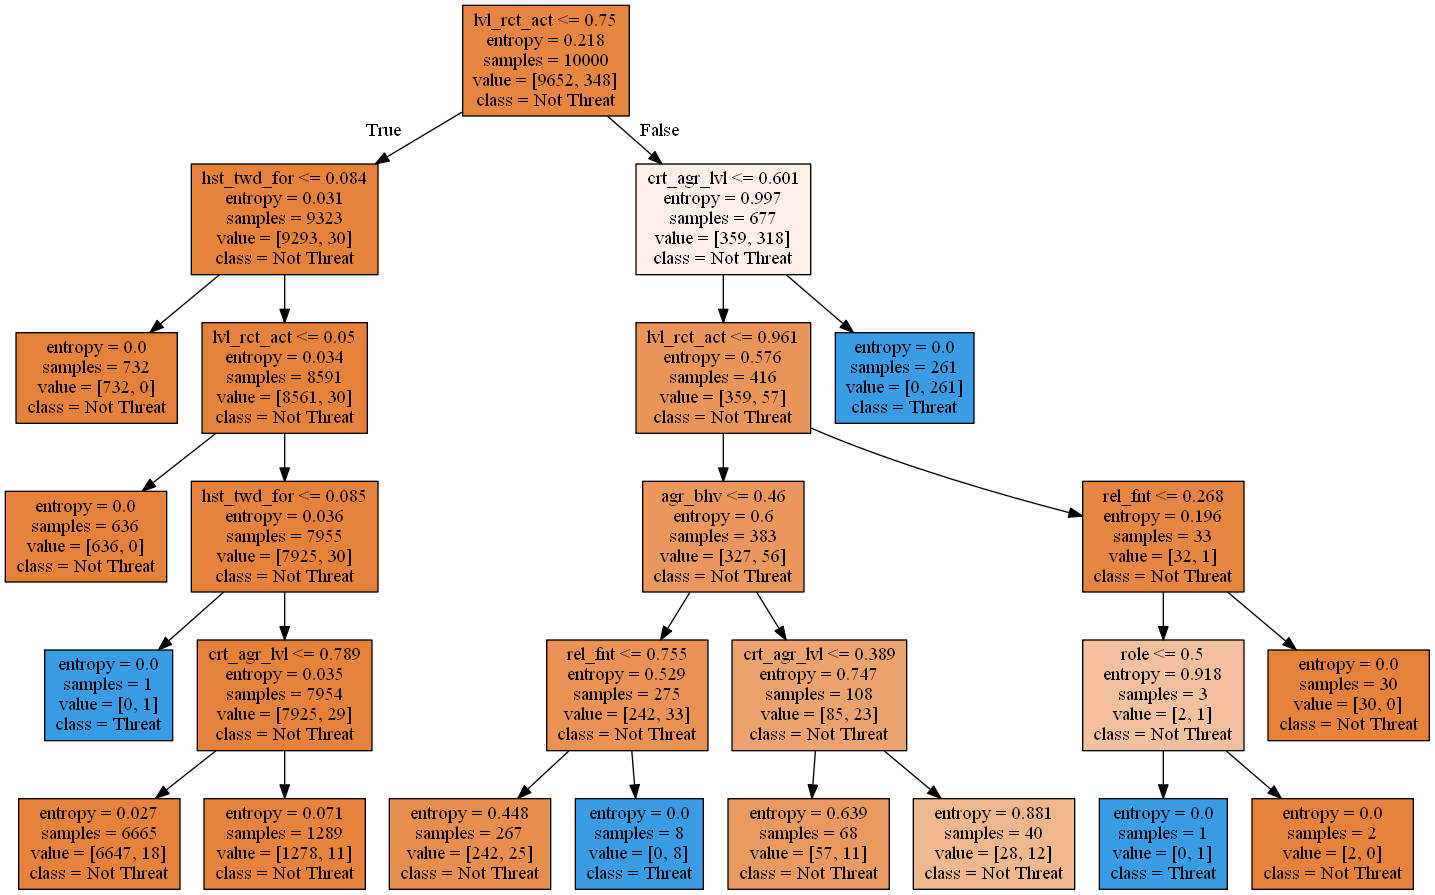

In [7]:
tree_X = data.drop(['is_current_threat', 'prob_threat'], 1)
tree_class_Y = data['is_current_threat']

class_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=5
)

class_tree.fit(tree_X, tree_class_Y)

dot_data = tree.export_graphviz(
    class_tree, out_file=None,
    feature_names=tree_X.columns,
    class_names=['Not Threat', 'Threat'],
    filled=True,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [8]:
tree_X_train, tree_X_test, tree_class_y_train, tree_class_y_test = train_test_split(tree_X, tree_class_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(class_tree.fit(tree_X_train, tree_class_y_train).score(tree_X_test, tree_class_y_test)))
print('R^2 Score: ' + str(class_tree.fit(tree_X, tree_class_Y).score(tree_X, tree_class_Y)))
print('Cross Validation:\n', cross_val_score(class_tree, tree_X, tree_class_Y, cv=10))

With 20% Holdout: 0.9975
R^2 Score: 0.976
Cross Validation:
 [0.99100899 0.99300699 0.997      0.988      0.999      0.995
 0.999      0.97       0.98498498 0.98898899]


# Decision Tree Regression, max_depth=5

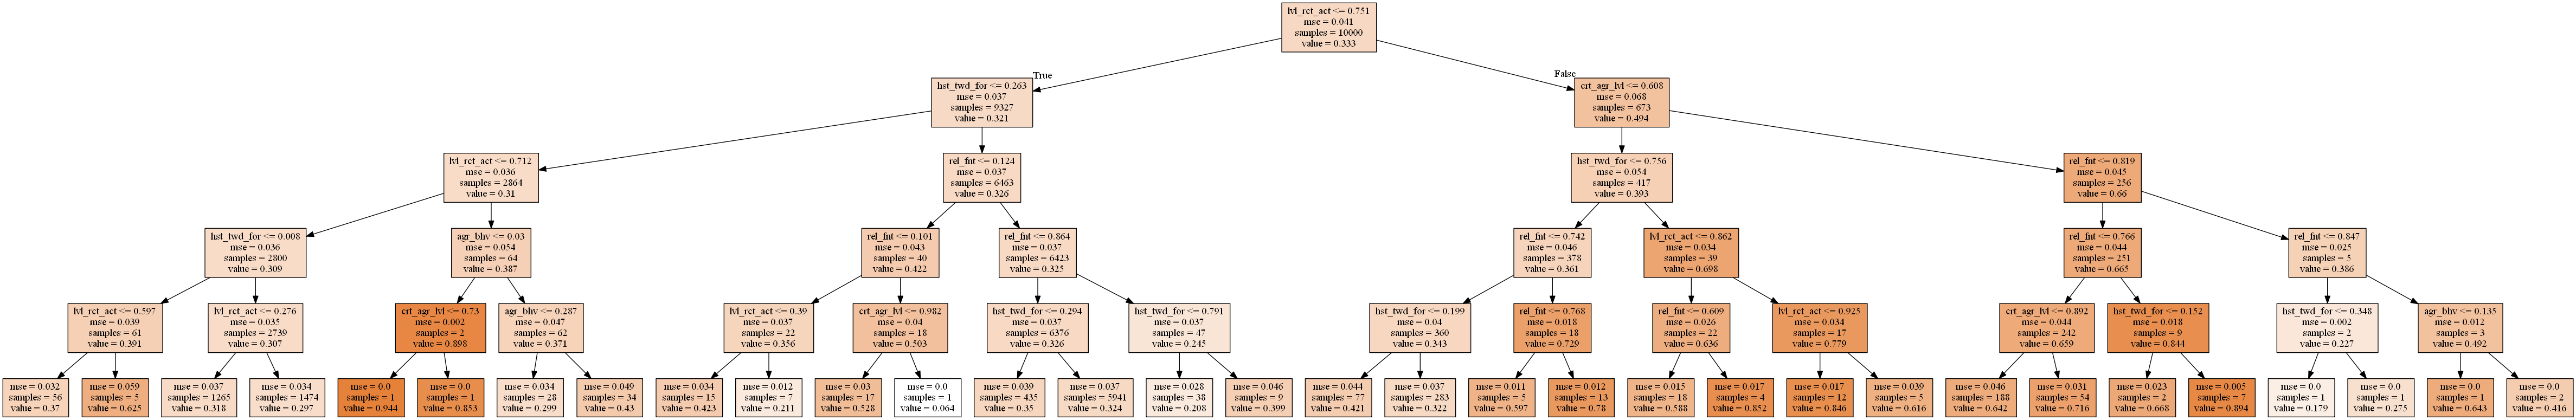

In [9]:
tree_regr_Y = data['prob_threat']

regr_tree = tree.DecisionTreeRegressor(max_depth=5)
regr_tree.fit(tree_X, tree_regr_Y)

dot_data = tree.export_graphviz(
    regr_tree, out_file=None,
    feature_names=tree_X.columns,
    class_names=['Not Threat', 'Threat'],
    filled=True,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [10]:
tree_X_train, tree_X_test, tree_regr_y_train, tree_regr_y_test = train_test_split(tree_X, tree_regr_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(regr_tree.fit(tree_X_train, tree_regr_y_train).score(tree_X_test, tree_regr_y_test)))
print('R^2:\n', regr_tree.fit(tree_X, tree_regr_Y).score(tree_X, tree_regr_Y))
print('Cross Validation:\n', cross_val_score(regr_tree, tree_X, tree_regr_Y, cv=10))

With 20% Holdout: 0.057584761022318125
R^2:
 0.10638474392557162
Cross Validation:
 [0.07596425 0.08156617 0.05501899 0.07792612 0.09331585 0.07622773
 0.10851576 0.0796328  0.01856245 0.06758685]


# Random Forest Classifier

In [11]:
rfc_X = data.drop(['is_current_threat', 'prob_threat'], 1)
rfc_Y = data['is_current_threat']
rfc = ensemble.RandomForestClassifier()
rfc_X_train, rfc_X_test, rfc_y_train, rfc_y_test = train_test_split(rfc_X, rfc_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(rfc.fit(rfc_X_train, rfc_y_train).score(rfc_X_test, rfc_y_test)))
print('R^2 Score: ' + str(rfc.fit(rfc_X, rfc_Y).score(rfc_X, rfc_Y)))
print('Cross Validation:\n', cross_val_score(rfc, rfc_X, rfc_Y, cv=10))

With 20% Holdout: 0.9975
R^2 Score: 0.9991
Cross Validation:
 [0.995005   0.996004   0.998      0.998      0.997      0.997
 0.999      0.996      0.99499499 0.99399399]


# Random Forest Regression

In [12]:
rfg_X = data.drop(['is_current_threat', 'prob_threat'], 1)
rfg_Y = data['prob_threat']
rfg = ensemble.RandomForestRegressor()
rfg_X_train, rfg_X_test, rfg_y_train, rfg_y_test = train_test_split(rfg_X, rfg_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(rfg.fit(rfg_X_train, rfc_y_train).score(rfc_X_test, rfc_y_test)))
print('R^2 Score: ' + str(rfg.fit(rfg_X, rfg_Y).score(rfg_X, rfg_Y)))
print('Cross Validation:\n', cross_val_score(rfg, rfg_X, rfg_Y, cv=10))

With 20% Holdout: 0.8881172839506173
R^2 Score: 0.8119646960111936
Cross Validation:
 [-0.03138081 -0.08494247 -0.0684928  -0.01508053  0.00180157 -0.01242513
  0.01565257 -0.02215725 -0.12247047 -0.03302603]


# Logistic Regression

In [13]:
log_X = data.drop(['is_current_threat', 'prob_threat'], 1)
log_Y = data['is_current_threat']
lr = LogisticRegression(C=1e9)
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(log_X, log_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(lr.fit(log_X_train, log_y_train).score(log_X_test, log_y_test)))
print('R^2 Score:\n', lr.fit(log_X, log_Y).score(log_X, log_Y))
print('Cross Validation:\n', cross_val_score(lr, log_X, log_Y, cv=10))

With 20% Holdout: 0.9825
R^2 Score:
 0.9786
Cross Validation:
 [0.97902098 0.97802198 0.979      0.979      0.979      0.977
 0.983      0.972      0.97297297 0.97497497]


# Ridge Regression, alpha=10

In [14]:
ridge_X = data.drop(['is_current_threat', 'prob_threat'], 1)
ridge_Y = data['prob_threat']
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
ridge_X_train, ridge_X_test, ridge_y_train, ridge_y_test = train_test_split(ridge_X, ridge_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(ridgeregr.fit(ridge_X_train, ridge_y_train).score(ridge_X_test, ridge_y_test)))
print('R^2 Score:\n', ridgeregr.fit(ridge_X, ridge_Y).score(ridge_X, ridge_Y))
print('Cross Validation:\n', cross_val_score(ridgeregr, ridge_X, ridge_Y, cv=10))

With 20% Holdout: -0.010002436923640001
R^2 Score:
 -0.004121336874850057
Cross Validation:
 [-0.0038972  -0.01795659 -0.00790617 -0.01471536  0.01063874  0.0016607
  0.02843491 -0.0108022  -0.0373867  -0.01961046]


# Lasso Regression, alpha=.35

In [15]:
lasso_X = data.drop(['is_current_threat', 'prob_threat'], 1)
lasso_Y = data['prob_threat']
lassoregr = linear_model.Lasso(alpha=.35)
lasso_X_train, lasso_X_test, lasso_y_train, lasso_y_test = train_test_split(lasso_X, lasso_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(lassoregr.fit(lasso_X_train, lasso_y_train).score(lasso_X_test, lasso_y_test)))
print('R^2 Score:\n', lassoregr.fit(lasso_X, lasso_Y).score(lasso_X, lasso_Y))
print('Cross Validation:\n', cross_val_score(lassoregr, lasso_X, lasso_Y, cv=10))

With 20% Holdout: -8.748913256750868e-06
R^2 Score:
 0.0
Cross Validation:
 [-2.10017155e-03 -1.45745243e-03 -1.82607411e-03 -3.17817886e-03
 -4.96403093e-05 -7.18657486e-04 -2.62909495e-04 -4.20726561e-05
 -1.62566493e-03 -5.90900766e-04]


# Support Vector Classifier, kernal=linear

In [16]:
svc_X = data.drop(['is_current_threat', 'prob_threat'], 1)
svc_Y = data['is_current_threat']
svm = SVC(kernel = 'linear')
svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(svc_X, svc_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(svm.fit(svm_X_train, svm_y_train).score(svm_X_test, svm_y_test)))
print('R^2 Score: ' + str(svm.fit(svc_X, svc_Y).score(svc_X, svc_Y)))
print('Cross Validation:\n', cross_val_score(svm, svc_X, svc_Y, cv=10))

With 20% Holdout: 0.9795
R^2 Score: 0.9748
Cross Validation:
 [0.97502498 0.97602398 0.974      0.972      0.979      0.974
 0.978      0.974      0.97397397 0.97697698]


# Support Vector Regression, gamma=auto

In [17]:
svr_X = data.drop(['is_current_threat', 'prob_threat'], 1)
svr_Y = data['prob_threat']
svr = SVR(gamma='auto')
svr_X_train, svr_X_test, svr_y_train, svr_y_test = train_test_split(svr_X, svr_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(svr.fit(svr_X_train, svr_y_train).score(svr_X_test, svr_y_test)))
print('R^2 Score: ' + str(svr.fit(svr_X, svr_Y).score(svr_X, svr_Y)))
print('Cross Validation:\n', cross_val_score(svr, svr_X, svr_Y, cv=10))

With 20% Holdout: -0.007947111397370366
R^2 Score: 0.05945524638259769
Cross Validation:
 [-0.02338242 -0.00844067 -0.02866383 -0.02022128  0.01086814  0.03243095
  0.0059621   0.00396466 -0.03162783 -0.00933117]


# Boosted Classifier; loss=deviance, n_estimators=500, max_depth=5

In [18]:
clf_X = data.drop(['is_current_threat', 'prob_threat'], 1)
clf_Y = data['is_current_threat']
params = {'loss': 'deviance', 'n_estimators':500, 'max_depth':10}

clf = ensemble.GradientBoostingClassifier(**params)
clf_X_train, clf_X_test, clf_y_train, clf_y_test = train_test_split(clf_X, clf_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(clf.fit(clf_X_train, clf_y_train).score(clf_X_test, clf_y_test)))
print('R^2 Score: ' + str(clf.fit(clf_X, clf_Y).score(clf_X, clf_Y)))
print('Cross Validation:\n', cross_val_score(clf, clf_X, clf_Y, cv=10))

With 20% Holdout: 0.998
R^2 Score: 1.0
Cross Validation:
 [0.995005   0.996004   0.998      0.997      0.999      0.997
 0.998      0.996      0.99399399 0.99499499]


# Boosted Regression; loss=ls, learning_rate=.1, n_estimators=500, max_depth=10

In [19]:
regr_X = data.drop(['is_current_threat', 'prob_threat'], 1)
regr_Y = data['prob_threat']
params = {'loss': 'ls', 'learning_rate': .1, 'n_estimators': 500, 'max_depth': 10}

regr = ensemble.GradientBoostingRegressor(**params)
regr_X_train, regr_X_test, regr_y_train, regr_y_test = train_test_split(regr_X, regr_Y, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(regr.fit(regr_X_train, regr_y_train).score(regr_X_test, regr_y_test)))
print('R^2 Score: ' + str(regr.fit(regr_X, regr_Y).score(regr_X, regr_Y)))
print('Cross Validation:\n', cross_val_score(regr, regr_X, regr_Y, cv=10))

With 20% Holdout: -0.08097307435081902
R^2 Score: 0.979610579952091
Cross Validation:
 [-0.05392744 -0.13366106 -0.09295351 -0.06249542 -0.09986602 -0.10375551
 -0.07355499 -0.04566809 -0.16454799 -0.04114541]
